In [2]:
import os 
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('/home/melissa/PROJECT_DIRECTORIES/MLESP_EEG/')
import artifactdetection as ad

### This notebook analyses the power results and marks epochs as noisy or clean based on a slope threshold

Load power file for each animal and separate into clean and noisy epochs based on the spectral slope threshold, append the analytics dataframe which counts the number of clean and noisy epochs for each animal to create an overall analytics dataframe.

**To run the slope analysis, you need to input the following:**
1. Directory path to find power analysis output 
2. Where to save noisy and clean dataframes
3. List of animals (can use the same as script from power analysis script)

In [6]:
directory_path = '/home/melissa/PREPROCESSING/ArtifactDetectTest/Power/'
save_clean_folder = '/home/melissa/PREPROCESSING/ArtifactDetectTest/clean_folder/'
analysis_ls = ['S7088', 'S7092', 'S7086', 'S7063', 'S7064', 'S7069', 'S7070', 'S7072', 'S7086',
               'S7091', 'S7101', 'S7094', 'S7096', 'S7098','S7068', 'S7074', 'S7075', 'S7071', 'S7076']

In [9]:
analytics_ls = []
analysis = ad.Analysis(directory_path, analysis_ls)
for animal in analysis_ls:
    print(animal)
    clean_power, noise_power, analytics_df = analysis.process_animal(animal = animal, save = True, save_path = save_clean_folder)
    analytics_ls.append(analytics_df)

S7088
S7092
S7086
S7063
S7064
S7069
S7070
S7072
S7086
S7091
S7101
S7094
S7096
S7098
S7068
S7074
S7075
S7071
S7076


In [12]:
analytics_summary = pd.concat(analytics_ls)
analytics_summary

,Animal_ID,Noisy_Epochs,Clean_Epochs
0,S7088,4250,13030
0,S7092,2236,15044
0,S7086,4082,30478
0,S7063,3709,30851
0,S7064,5234,29326
0,S7069,3392,31168
0,S7070,4210,30350
0,S7072,5743,28817
0,S7086,4082,30478
0,S7091,3934,30626


In [13]:
clean_ls = []
noisy_ls = []
for animal in analysis_ls:
    print(animal)
    clean_df = pd.read_csv(save_clean_folder + f'{animal}_clean_power.csv')
    noise_df = pd.read_csv(save_clean_folder + f'{animal}_noise_power.csv')
    clean_ls.append(clean_df)
    noisy_ls.append(noise_df)

S7088
S7092
S7086
S7063
S7064
S7069
S7070
S7072
S7086
S7091
S7101
S7094
S7096
S7098
S7068
S7074
S7075
S7071
S7076


In [14]:
clean_concat = pd.concat(clean_ls)
noise_concat = pd.concat(noisy_ls)

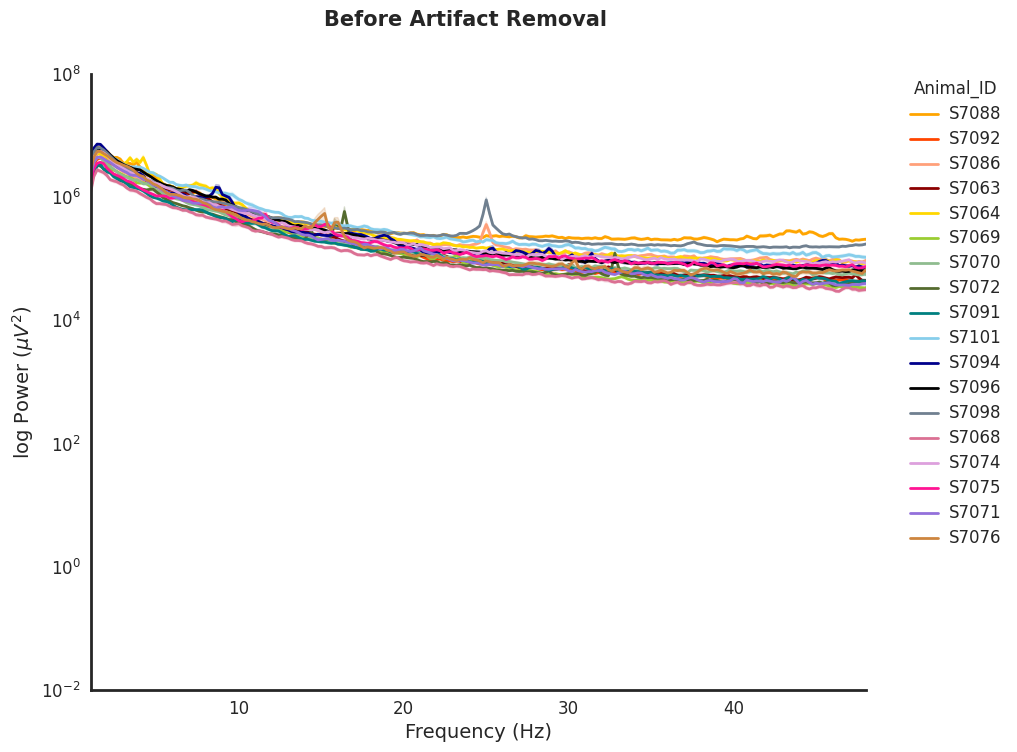

In [15]:
analysis.plot_results(noise_concat, palette=None, hue = 'Animal_ID', ylim = [10**-2, 10**8], title = 'Before Artifact Removal',
            save_folder = '/home/melissa/PREPROCESSING/ArtifactDetectTest/', save_as = 'before_artifact_removal')

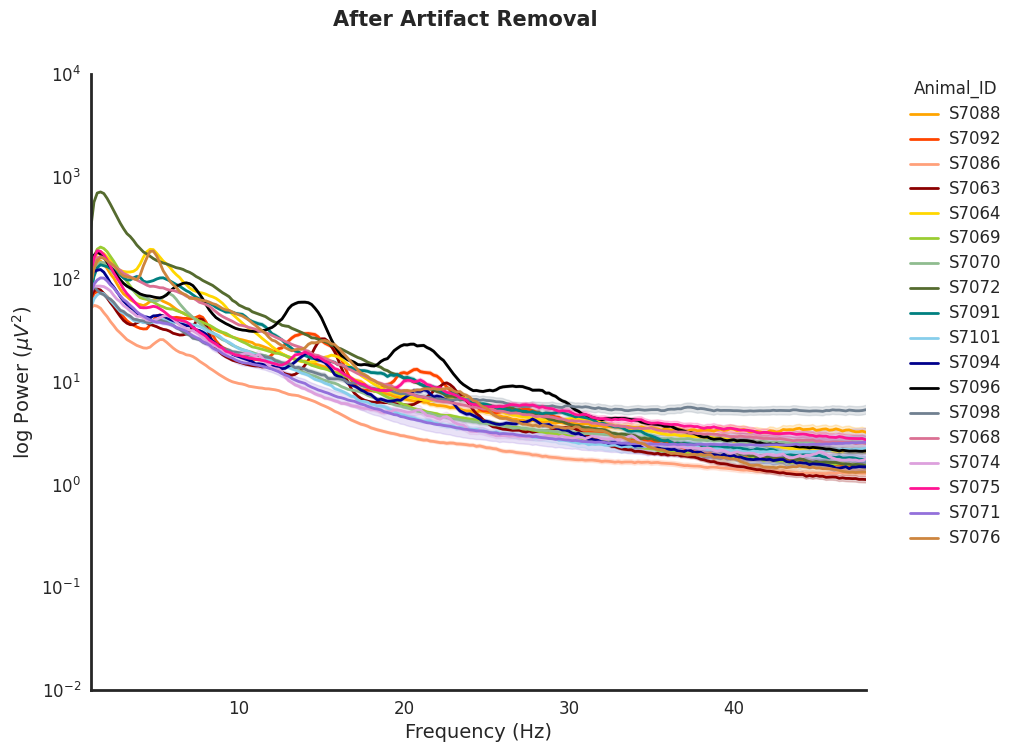

In [16]:
analysis.plot_results(clean_concat, palette=None, hue = 'Animal_ID', title = 'After Artifact Removal', 
                     save_folder = '/home/melissa/PREPROCESSING/ArtifactDetectTest/', save_as = 'after_artifact_removal')

#### If you want to plot by genotype or input your own colour palette, you can change these parameters as shown below: 

In [17]:
WT_ls = ['S7068', 'S7070', 'S7071', 'S7074', 'S7086', 'S7091', 'S7098', 'S7101']
GAP_ls = ['S7063', 'S7064', 'S7069', 'S7072', 'S7075', 'S7076', 'S7088', 'S7092', 'S7094', 'S7096']
wt_blue_palette = ['#001f3f', '#003366', '#0052cc','#0074D9', '#0099ff','#33aaff','#7FDBFF','#39CCCC','#3D9970', 
                   '#2ECC40', '#01FF70', '#B2D8FF', '#6699cc']


gap_red_palette = ['#FF4136',  '#FF5733', '#FF6F61', '#FF851B', '#FF8C42','#FF9F80', '#FFDC00', '#85144b', '#B10DC9',
               '#F012BE', '#FF69B4', '#FFC0CB', '#FFB6C1']


In [18]:
wt_df = clean_concat.loc[clean_concat['Animal_ID'].isin(WT_ls)]
gap_df = clean_concat.loc[clean_concat['Animal_ID'].isin(GAP_ls)]

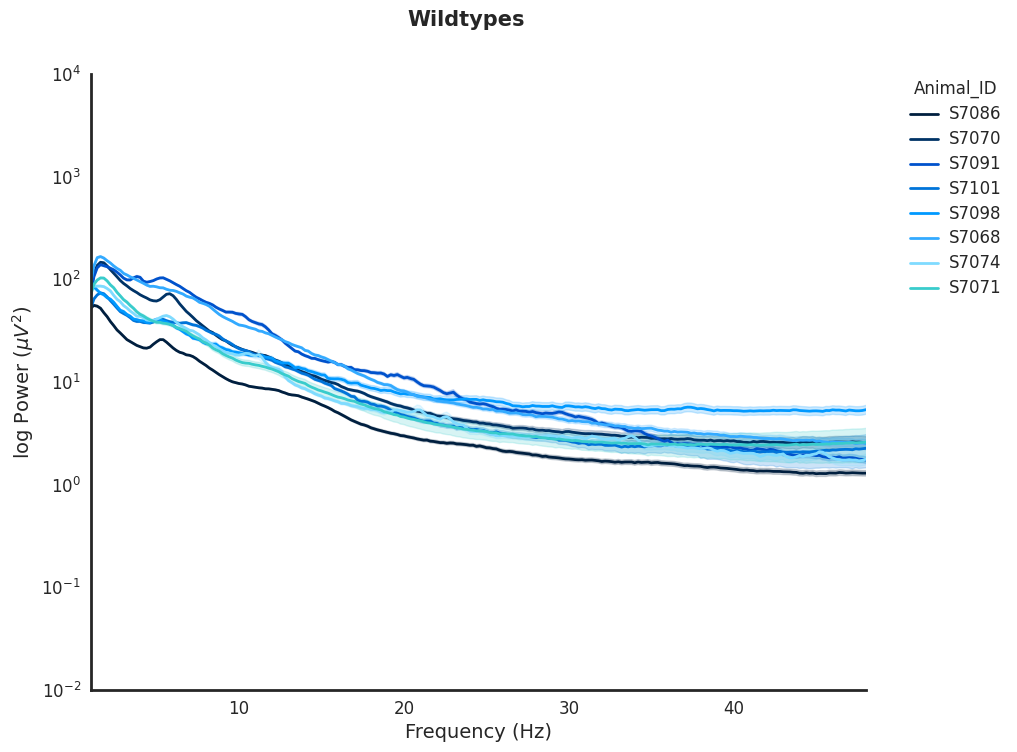

In [19]:
analysis.plot_results(wt_df, palette= wt_blue_palette[0:8], hue = 'Animal_ID', ylim = [10**-2, 10**4], title = 'Wildtypes',
            save_folder = '/home/melissa/PREPROCESSING/ArtifactDetectTest/', save_as = 'wildtypes')

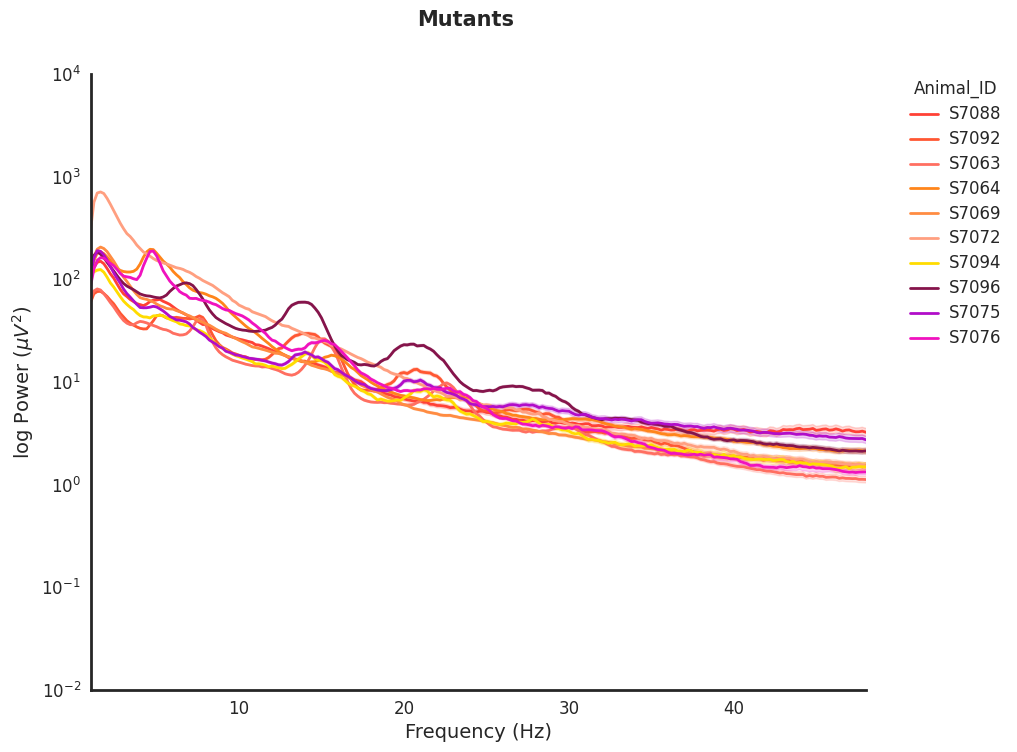

In [21]:
analysis.plot_results(gap_df, palette= gap_red_palette[0:10], hue = 'Animal_ID', ylim = [10**-2, 10**4], title = 'Mutants',
            save_folder = '/home/melissa/PREPROCESSING/ArtifactDetectTest/', save_as = 'mutants')